In [47]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [48]:
file_path = '/content/SONY.csv'

# Đọc dữ liệu từ file CSV
df = pd.read_csv(file_path, index_col='Date', parse_dates=True)

In [49]:
df

,Close,Open,High,Low
Date,,,,
2019-03-01,47.890000,47.820000,48.06000,47.690000
2019-03-02,83.842011,83.861625,84.49096,83.182978
2019-03-03,83.842011,83.861625,84.49096,83.182978
2019-03-04,47.620000,47.780000,47.87000,47.230000
2019-03-05,47.660000,47.750000,47.90000,47.530000
...,...,...,...,...
2024-05-28,79.860000,80.750000,80.77000,79.770000
2024-05-29,78.450000,78.990000,79.37000,78.340000
2024-05-30,80.790000,80.480000,81.26000,80.150000


In [50]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(df)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -2.392320833391547
p-value: 0.14391553741322682
Critical Values:
   1%: -3.433800034824216
   5%: -2.8630639946701955
   10%: -2.567581317164871
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -2.3661530516850466
p-value: 0.15151817458590833
Critical Values:
   1%: -3.433805504046101
   5%: -2.8630664092088716
   10%: -2.5675826028083906
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -2.361631626780933
p-value: 0.15285962951277549
Critical Values:
   1%: -3.433805504046101
   5%: -2.8630664092088716
   10%: -2.5675826028083906
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -2.3913520987564962
p-value: 0.1441921062472405
Critical Values:
   1%: -3.433800034824216
   5%: -2.8630639946701955
   10%: -2.567581317164871
==> Không phải chuỗi dừng



In [51]:
from sklearn.model_selection import train_test_split

# chia bộ dữ liệu theo tỉ lệ 6:4
train, test = train_test_split(df, test_size=0.4, shuffle=False)

# dùng diff để chuyển đổi bộ dữ liệu
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [52]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(train_diff)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -8.839395248860797
p-value: 1.6844821543669718e-14
Critical Values:
   1%: -3.436150192101723
   5%: -2.8641011312034057
   10%: -2.5681336157882373
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -8.950078463923584
p-value: 8.772006819004003e-15
Critical Values:
   1%: -3.436150192101723
   5%: -2.8641011312034057
   10%: -2.5681336157882373
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -8.8859095765905
p-value: 1.2804618812723272e-14
Critical Values:
   1%: -3.436150192101723
   5%: -2.8641011312034057
   10%: -2.5681336157882373
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -8.884312548143985
p-value: 1.2925743368567226e-14
Critical Values:
   1%: -3.436150192101723
   5%: -2.8641011312034057
   10%: -2.5681336157882373
==> Là chuỗi dừng



In [53]:
!pip install pmdarima

In [54]:
from pmdarima import auto_arima
import pandas as pd
pq = []
for column in train_diff:
    print(f'Cột : {column}')
    stepwise_model = auto_arima(train_diff[column],start_p=1, start_q=1,max_p=5, max_q=5, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)

    parameter = stepwise_model.get_params().get('order')
    print(f'bậc tối ưu cho cột:{column} là: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Cột : Close
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8778.358, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9176.282, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9176.823, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=8920.814, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8535.558, Time=1.53 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=8966.091, Time=0.32 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=8524.078, Time=0.84 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=8954.230, Time=0.60 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=8270.762, Time=0.71 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=8862.824, Time=0.35 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=7707.212, Time=1.56 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=8179.696, Time=1.27 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=7393.505, Time=7.74 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=7830.869, Time=5.05 sec
 ARIMA(5,0,3)(0,0,0)[

In [56]:

model = VARMAX(train_diff, order=(5, 5))
results = model.fit()

print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                  Statespace Model Results                                  
Dep. Variable:     ['Close', 'Open', 'High', 'Low']   No. Observations:                 1151
Model:                                   VARMA(5,5)   Log Likelihood               -5896.399
                                        + intercept   AIC                          12140.798
Date:                              Sat, 08 Jun 2024   BIC                          13019.217
Time:                                      08:45:31   HQIC                         12472.372
Sample:                                  03-02-2019                                         
                                       - 04-25-2022                                         
Covariance Type:                                opg                                         
Ljung-Box (L1) (Q):     62.46, 1.61, 0.18, 0.95   Jarque-Bera (JB):   443.51, 2694.75, 4772.58, 3773.95
Prob(Q):                 0.00, 0.20, 0.67, 0.33   Prob(JB):

In [57]:
predict = results.get_prediction(start = len(train), end = len(train) + len(test) - 1)
predicts = predict.predicted_mean

In [58]:
predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
predicts['Date'] = test.index
predicts
predicts_date = predicts.set_index('Date')
predicts_date

,Open_predicted,High_predicted,Low_predicted,Close_predicted
Date,,,,
2022-04-26,-0.296311,-0.041283,-0.012845,-0.320254
2022-04-27,0.526582,0.500160,0.512331,0.514379
2022-04-28,-1.247251,-1.387288,-1.423776,-1.236479
2022-04-29,-1.446689,-1.347264,-1.374812,-1.380498
2022-04-30,0.168562,-0.035221,-0.017567,0.106813
...,...,...,...,...
2024-05-28,0.035351,0.035866,0.035826,0.035138
2024-05-29,0.035351,0.035866,0.035826,0.035138
2024-05-30,0.035351,0.035866,0.035826,0.035138


In [59]:
# Lấy giá trị cuối cùng của dữ liệu gốc trước khi diff
last_original_values = df.iloc[-len(test) - 1]
# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'], index=test.index)

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values.copy()

# Thực hiện inverse differencing cho từng ngày dự đoán
for index, row in predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data.loc[index] = current_values

In [60]:


# Tính toán MAPE và RMSE
mape = mean_absolute_percentage_error(test, predicts_date)
rmse = np.sqrt(mean_squared_error(test, predicts_date))
mse = mean_squared_error(test, predicts_date)
r2 = r2_score(test, predicts_date)

print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')

results_GBM = pd.DataFrame([['Gradient Boosting', mape, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results_GBM

MAPE: 0.9996
RMSE: 85.2537
MSE: 7268.1967
R²: -190.9120


,Model,MAE,MSE,RMSE,R2 Score
0,Gradient Boosting,0.999592,7268.196673,85.253719,-190.911966


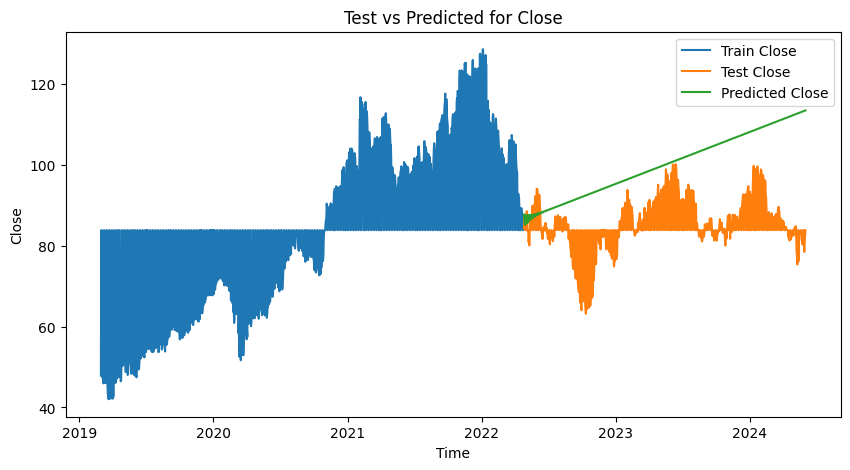

In [61]:
# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()

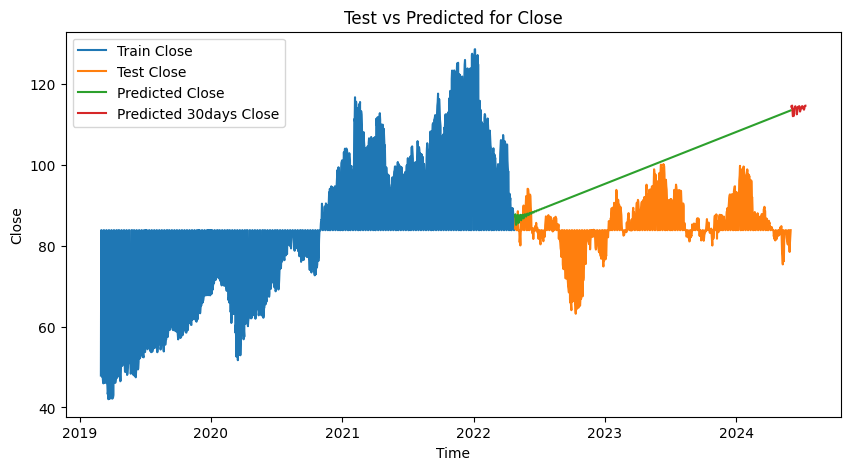

In [62]:

last_original_values_afterPredict = forecast_data.iloc[len(forecast_data) - 1]
# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data_30days = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values_afterPredict.copy()

# Dự báo thêm 30 ngày
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
future_predict = results.get_forecast(steps=30)
future_predicts = future_predict.predicted_mean
future_predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
future_predicts['Date'] = future_dates
future_predicts_date = future_predicts.set_index('Date')

# Thực hiện inverse differencing cho các giá trị dự báo tương lai
for index, row in future_predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data_30days.loc[index] = current_values.copy()

# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.plot(forecast_data_30days.index, forecast_data_30days[col], label=f'Predicted 30days {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()

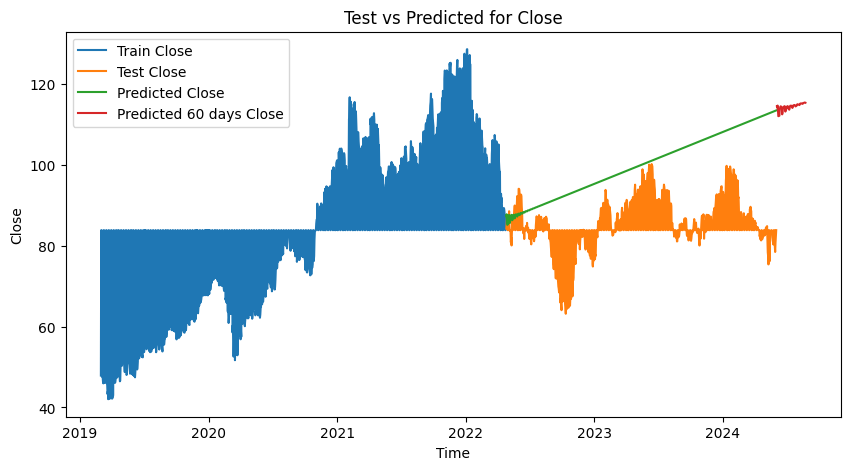

In [63]:

# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data_60days = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values_afterPredict.copy()

# Dự báo thêm 60 ngày
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=60, freq='B')
future_predict = results.get_forecast(steps=60)
future_predicts = future_predict.predicted_mean
future_predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
future_predicts['Date'] = future_dates
future_predicts_date = future_predicts.set_index('Date')

# Thực hiện inverse differencing cho các giá trị dự báo tương lai
for index, row in future_predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data_60days.loc[index] = current_values.copy()

# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.plot(forecast_data_60days.index, forecast_data_60days[col], label=f'Predicted 60 days {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()

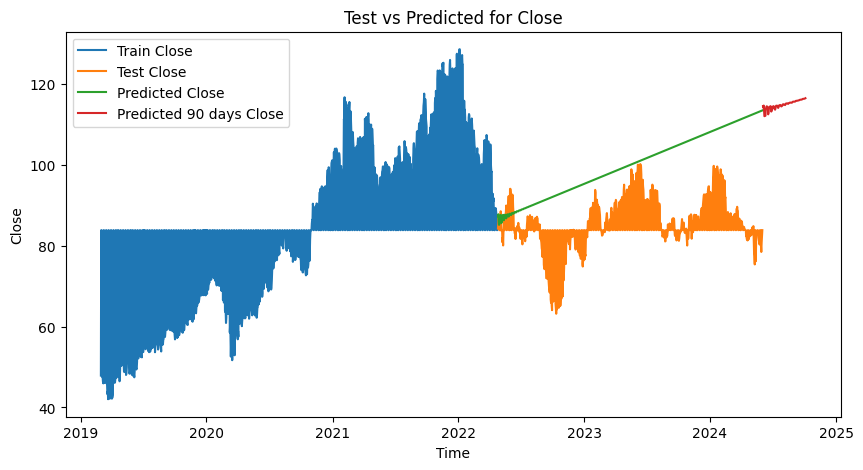

In [64]:

# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data_90days = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values_afterPredict.copy()

# Dự báo thêm 90 ngày
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=90, freq='B')
future_predict = results.get_forecast(steps=90)
future_predicts = future_predict.predicted_mean
future_predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
future_predicts['Date'] = future_dates
future_predicts_date = future_predicts.set_index('Date')

# Thực hiện inverse differencing cho các giá trị dự báo tương lai
for index, row in future_predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data_90days.loc[index] = current_values.copy()

# Vẽ biểu đồ cho mỗi cặp cột
for col in ['Close']:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.plot(forecast_data_90days.index, forecast_data_90days[col], label=f'Predicted 90 days {col}')
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()